In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [84]:
df = pd.read_csv('Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [85]:
df1 = df.drop(['ID','CollegeID','CollegeCityID'],axis=1)
df1.shape

(2998, 31)

In [86]:
df1.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990-10-22,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,1990-05-15,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,1991-05-04,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,1990-10-30,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   DOB                    2998 non-null   object 
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   object 
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   object 
 7   CollegeTier            2998 non-null   int64  
 8   Degree                 2998 non-null   object 
 9   Specialization         2998 non-null   object 
 10  collegeGPA             2998 non-null   float64
 11  CollegeCityTier        2998 non-null   int64  
 12  CollegeState           2998 non-null   object 
 13  GraduationYear         2998 non-null   int64  
 14  English                2998 non-null   int64  
 15  Logi

In [88]:
df1.isna().any()

Gender                   False
DOB                      False
10percentage             False
10board                  False
12graduation             False
12percentage             False
12board                  False
CollegeTier              False
Degree                   False
Specialization           False
collegeGPA               False
CollegeCityTier          False
CollegeState             False
GraduationYear           False
English                  False
Logical                  False
Quant                    False
Domain                   False
ComputerProgramming      False
ElectronicsAndSemicon    False
ComputerScience          False
MechanicalEngg           False
ElectricalEngg           False
TelecomEngg              False
CivilEngg                False
conscientiousness        False
agreeableness            False
extraversion             False
nueroticism              False
openess_to_experience    False
Salary                   False
dtype: bool

In [89]:
df1.Gender.value_counts()

m    2282
f     716
Name: Gender, dtype: int64

In [90]:
df1.Gender=df1.Gender.map({'m': 1, 'f': 0})

In [91]:
df1.Gender.value_counts()

1    2282
0     716
Name: Gender, dtype: int64

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   int64  
 1   DOB                    2998 non-null   object 
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   object 
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   object 
 7   CollegeTier            2998 non-null   int64  
 8   Degree                 2998 non-null   object 
 9   Specialization         2998 non-null   object 
 10  collegeGPA             2998 non-null   float64
 11  CollegeCityTier        2998 non-null   int64  
 12  CollegeState           2998 non-null   object 
 13  GraduationYear         2998 non-null   int64  
 14  English                2998 non-null   int64  
 15  Logi

In [93]:
df1.DOB = pd.to_datetime(df1.DOB)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Gender                 2998 non-null   int64         
 1   DOB                    2998 non-null   datetime64[ns]
 2   10percentage           2998 non-null   float64       
 3   10board                2998 non-null   object        
 4   12graduation           2998 non-null   int64         
 5   12percentage           2998 non-null   float64       
 6   12board                2998 non-null   object        
 7   CollegeTier            2998 non-null   int64         
 8   Degree                 2998 non-null   object        
 9   Specialization         2998 non-null   object        
 10  collegeGPA             2998 non-null   float64       
 11  CollegeCityTier        2998 non-null   int64         
 12  CollegeState           2998 non-null   object        
 13  Gra

In [94]:
df1 = df1.assign(
    dob_year = df1.DOB.dt.year,
    dob_month = df1.DOB.dt.month,
    dob_day = df1.DOB.dt.day
)
df1.shape

(2998, 34)

In [95]:
df1.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,dob_year,dob_month,dob_day
0,0,1990-10-22,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,1,1990-05-15,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,...,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,5,15
2,1,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,...,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,8,21
3,1,1991-05-04,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,...,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,5,4
4,0,1990-10-30,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,...,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [96]:
df1.drop(['10board'],axis=1,inplace=True)

In [97]:
df1.head()

,Gender,DOB,10percentage,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,dob_year,dob_month,dob_day
0,0,1990-10-22,87.80,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,...,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,1,1990-05-15,57.00,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,...,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,5,15
2,1,1989-08-21,77.33,2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,...,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,8,21
3,1,1991-05-04,84.30,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,...,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,5,4
4,0,1990-10-30,82.00,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,...,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [98]:
df1.drop('12board',axis=1,inplace=True)

In [99]:
df1.shape

(2998, 32)

In [100]:
df1.drop('DOB',axis=1,inplace=True)

In [101]:
df1.head()

,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,dob_year,dob_month,dob_day
0,0,87.80,2009,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,...,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990,10,22
1,1,57.00,2010,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,...,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990,5,15
2,1,77.33,2007,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,...,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989,8,21
3,1,84.30,2009,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,1,Delhi,...,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991,5,4
4,0,82.00,2008,75.00,2,B.Tech/B.E.,biotechnology,64.30,1,Tamil Nadu,...,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990,10,30


In [102]:
df1.Degree.value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [103]:
df1.shape

(2998, 31)

In [104]:
df1 = pd.get_dummies(df1, columns=['Degree'])
df1.shape

(2998, 34)

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   int64  
 1   10percentage           2998 non-null   float64
 2   12graduation           2998 non-null   int64  
 3   12percentage           2998 non-null   float64
 4   CollegeTier            2998 non-null   int64  
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   CollegeCityTier        2998 non-null   int64  
 8   CollegeState           2998 non-null   object 
 9   GraduationYear         2998 non-null   int64  
 10  English                2998 non-null   int64  
 11  Logical                2998 non-null   int64  
 12  Quant                  2998 non-null   int64  
 13  Domain                 2998 non-null   float64
 14  ComputerProgramming    2998 non-null   int64  
 15  Elec

In [106]:
df1.shape

(2998, 34)

In [107]:
df1.CollegeState.value_counts()

Uttar Pradesh        698
Karnataka            281
Tamil Nadu           264
Telangana            249
Maharashtra          189
Andhra Pradesh       172
West Bengal          145
Madhya Pradesh       144
Punjab               141
Haryana              136
Orissa               130
Rajasthan            126
Delhi                122
Uttarakhand           81
Kerala                24
Jharkhand             20
Gujarat               18
Chhattisgarh          17
Himachal Pradesh      13
Bihar                  8
Union Territory        5
Jammu and Kashmir      5
Assam                  5
Sikkim                 2
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [108]:
df1.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

Im thinking of keeping only categories which have freq >20 and encoding them while dropping others, however will try both with and without!

dropping both completely!

In [109]:
df1.drop(['Specialization','CollegeState'],axis=1,inplace=True)
df1.shape

(2998, 32)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   int64  
 1   10percentage           2998 non-null   float64
 2   12graduation           2998 non-null   int64  
 3   12percentage           2998 non-null   float64
 4   CollegeTier            2998 non-null   int64  
 5   collegeGPA             2998 non-null   float64
 6   CollegeCityTier        2998 non-null   int64  
 7   GraduationYear         2998 non-null   int64  
 8   English                2998 non-null   int64  
 9   Logical                2998 non-null   int64  
 10  Quant                  2998 non-null   int64  
 11  Domain                 2998 non-null   float64
 12  ComputerProgramming    2998 non-null   int64  
 13  ElectronicsAndSemicon  2998 non-null   int64  
 14  ComputerScience        2998 non-null   int64  
 15  Mech

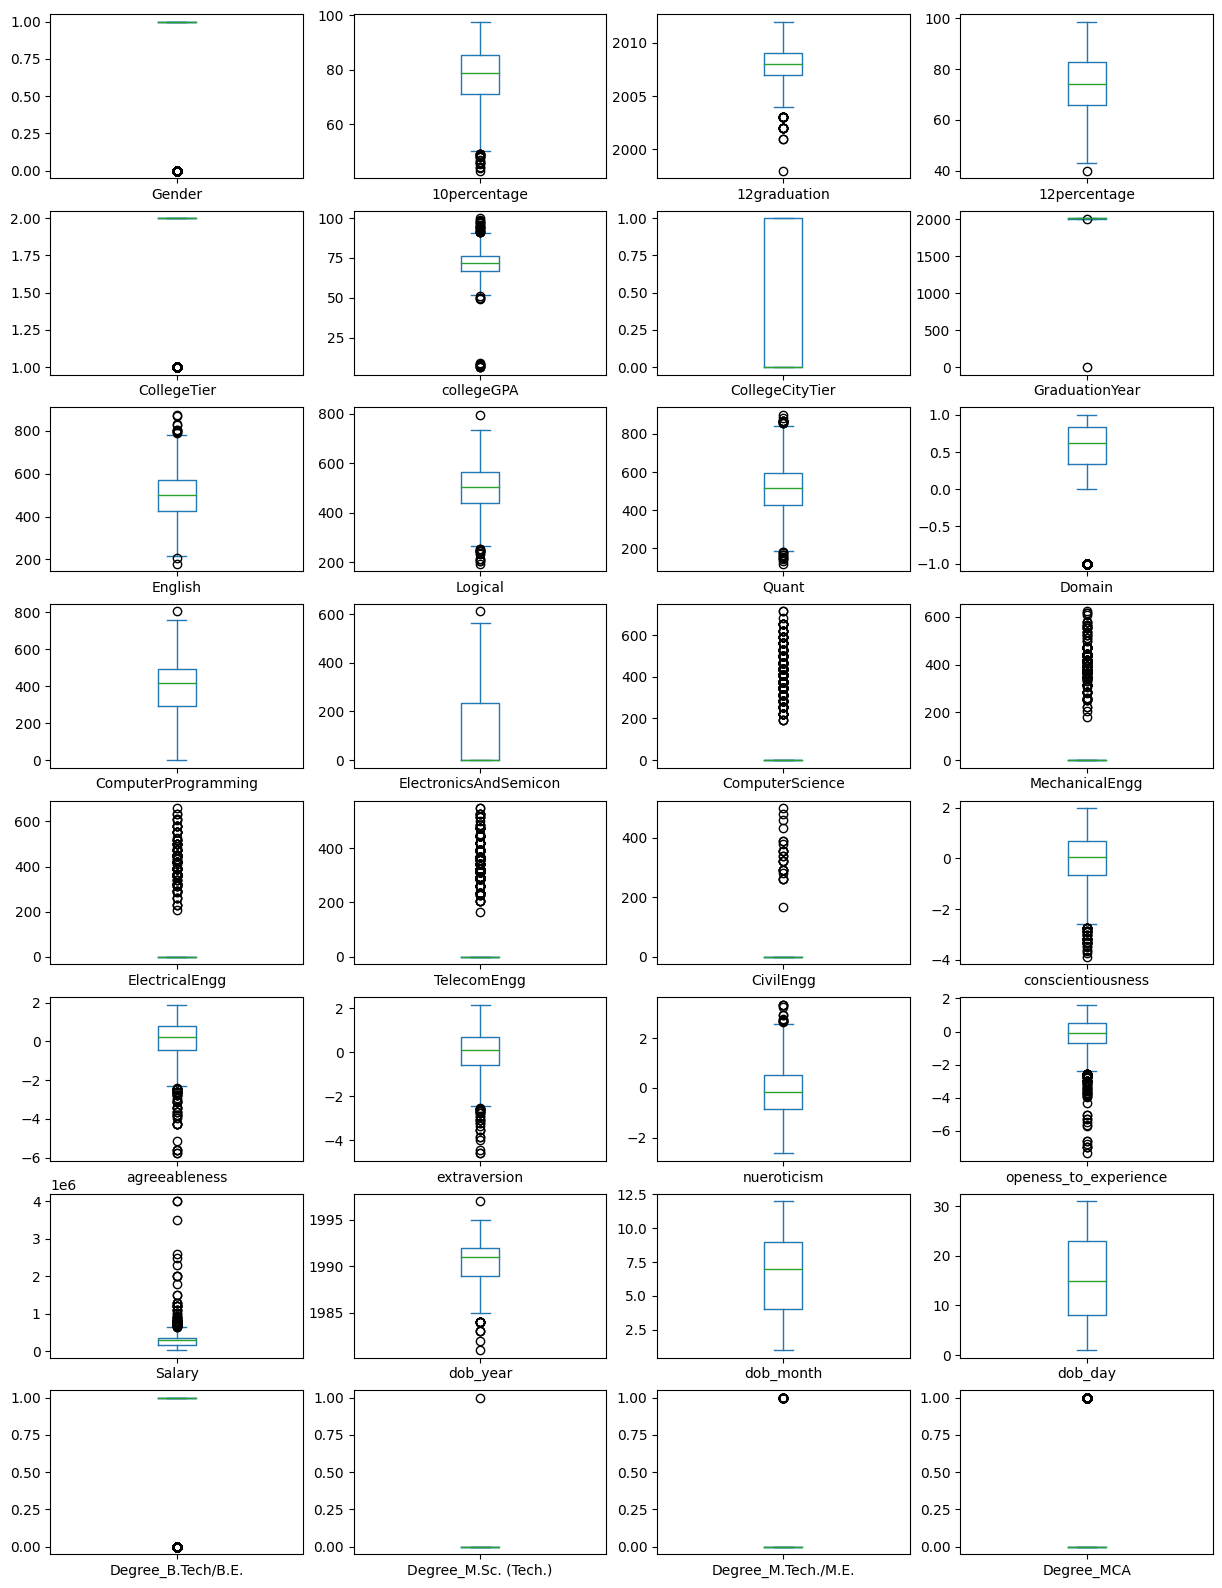

In [111]:
df1.plot(kind = "box",subplots = True,layout = (8,4),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [123]:
df1.describe().to_csv('describe_df1.csv')

In [80]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

not removing outliers from dummy variables

In [153]:
rem_list = ['Degree_B.Tech/B.E.','Degree_M.Sc. (Tech.)',
 'Degree_MCA','Degree_M.Tech./M.E.','Gender','ComputerProgramming',	'ElectronicsAndSemicon',
	'ComputerScience','MechanicalEngg',	'ElectricalEngg',
	'TelecomEngg', 'CollegeTier','MechanicalEngg',
 'TelecomEngg',
 'CivilEngg','Degree_M.Sc. (Tech.)',
 'Degree_MCA','GraduationYear',
]
len(rem_list)

18

In [154]:
a = df1.columns.tolist()

In [155]:
for i in a:
    if i in rem_list:
        a.remove(i)

manually removing which couldn't be removed above! for whatever reason!

In [ ]:
# a.remove('MechanicalEngg')

In [170]:
a

['10percentage',
 '12graduation',
 '12percentage',
 'collegeGPA',
 'CollegeCityTier',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Salary',
 'dob_year',
 'dob_month',
 'dob_day']

In [171]:
len(a)

18

In [172]:
df1.shape

(2998, 32)

In [173]:
df1 = treat_outliers_all(df1 , a)

In [174]:
df1.describe()

,Gender,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,nueroticism,openess_to_experience,Salary,dob_year,dob_month,dob_day,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,0.761174,77.680347,2008.096398,74.341428,1.924616,71.620951,0.296197,2011.939960,500.969646,500.528144,...,-0.147267,-0.112096,293672.114743,1990.431788,6.599066,15.187792,0.919613,0.000334,0.013342,0.066711
std,0.426437,9.960131,1.580784,11.119184,0.264053,7.335566,0.456655,36.780582,104.954777,86.914984,...,1.008977,0.895623,138316.375203,1.729959,3.367893,8.881064,0.271937,0.018264,0.114755,0.249563
min,0.000000,49.450000,2004.000000,41.100000,1.000000,51.875000,0.000000,0.000000,207.500000,255.625000,...,-2.643000,-2.426600,35000.000000,1984.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,71.140000,2007.000000,66.000000,2.000000,66.530000,0.000000,2012.000000,425.000000,441.250000,...,-0.868200,-0.669200,180000.000000,1989.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,78.965000,2008.000000,74.000000,2.000000,71.800000,0.000000,2013.000000,500.000000,505.000000,...,-0.172700,-0.094300,300000.000000,1991.000000,7.000000,15.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,85.600000,2009.000000,82.600000,2.000000,76.300000,1.000000,2014.000000,570.000000,565.000000,...,0.526200,0.502400,370000.000000,1992.000000,9.000000,23.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,97.760000,2012.000000,98.700000,2.000000,90.955000,1.000000,2017.000000,787.500000,750.625000,...,2.617800,1.630200,655000.000000,1996.500000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000


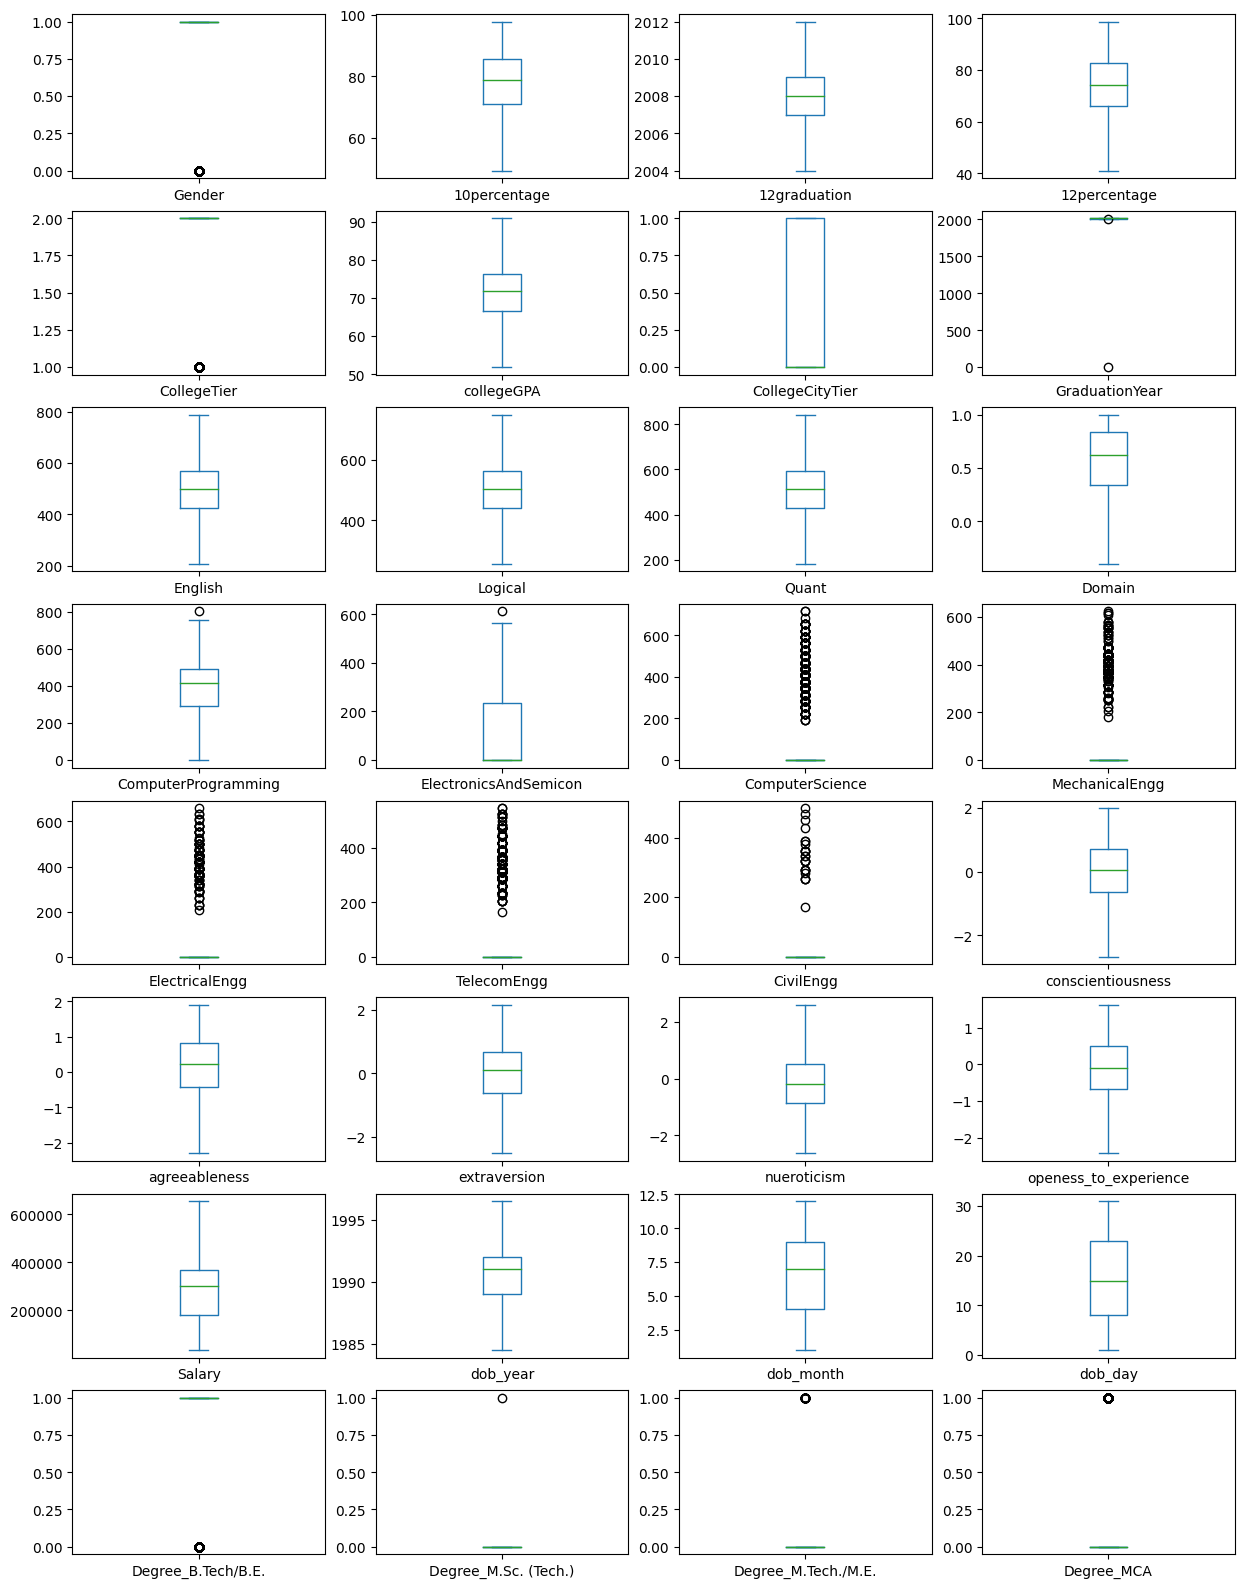

In [175]:
df1.plot(kind = "box",subplots = True,layout = (8,4),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [184]:
df1.GraduationYear = pd.to_datetime(df1.GraduationYear)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Gender                 2998 non-null   int64         
 1   10percentage           2998 non-null   float64       
 2   12graduation           2998 non-null   int64         
 3   12percentage           2998 non-null   float64       
 4   CollegeTier            2998 non-null   int64         
 5   collegeGPA             2998 non-null   float64       
 6   CollegeCityTier        2998 non-null   int64         
 7   GraduationYear         2998 non-null   datetime64[ns]
 8   English                2998 non-null   float64       
 9   Logical                2998 non-null   float64       
 10  Quant                  2998 non-null   float64       
 11  Domain                 2998 non-null   float64       
 12  ComputerProgramming    2998 non-null   int64         
 13  Ele

In [185]:
df1 = df1.assign(
    grad_year = df1.GraduationYear.dt.year,
    grad_month = df1.GraduationYear.dt.month,
    grad_day = df1.GraduationYear.dt.day
)
df1.shape

(2998, 35)

In [186]:
df1.drop('GraduationYear',axis=1,inplace=True)
df1.shape

(2998, 34)

In [198]:
df1['12graduation'] = pd.to_datetime(df1['12graduation'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Gender                 2998 non-null   int64         
 1   10percentage           2998 non-null   float64       
 2   12graduation           2998 non-null   datetime64[ns]
 3   12percentage           2998 non-null   float64       
 4   CollegeTier            2998 non-null   int64         
 5   collegeGPA             2998 non-null   float64       
 6   CollegeCityTier        2998 non-null   int64         
 7   English                2998 non-null   float64       
 8   Logical                2998 non-null   float64       
 9   Quant                  2998 non-null   float64       
 10  Domain                 2998 non-null   float64       
 11  ComputerProgramming    2998 non-null   int64         
 12  ElectronicsAndSemicon  2998 non-null   int64         
 13  Com

In [199]:
df1 = df1.assign(
    grad12_year = df1['12graduation'].dt.year,
)
df1.shape

(2998, 35)

In [200]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Gender                 2998 non-null   int64         
 1   10percentage           2998 non-null   float64       
 2   12graduation           2998 non-null   datetime64[ns]
 3   12percentage           2998 non-null   float64       
 4   CollegeTier            2998 non-null   int64         
 5   collegeGPA             2998 non-null   float64       
 6   CollegeCityTier        2998 non-null   int64         
 7   English                2998 non-null   float64       
 8   Logical                2998 non-null   float64       
 9   Quant                  2998 non-null   float64       
 10  Domain                 2998 non-null   float64       
 11  ComputerProgramming    2998 non-null   int64         
 12  ElectronicsAndSemicon  2998 non-null   int64         
 13  Com

In [202]:
df1.drop(['12graduation'],axis=1,inplace=True)
df1.shape

(2998, 34)

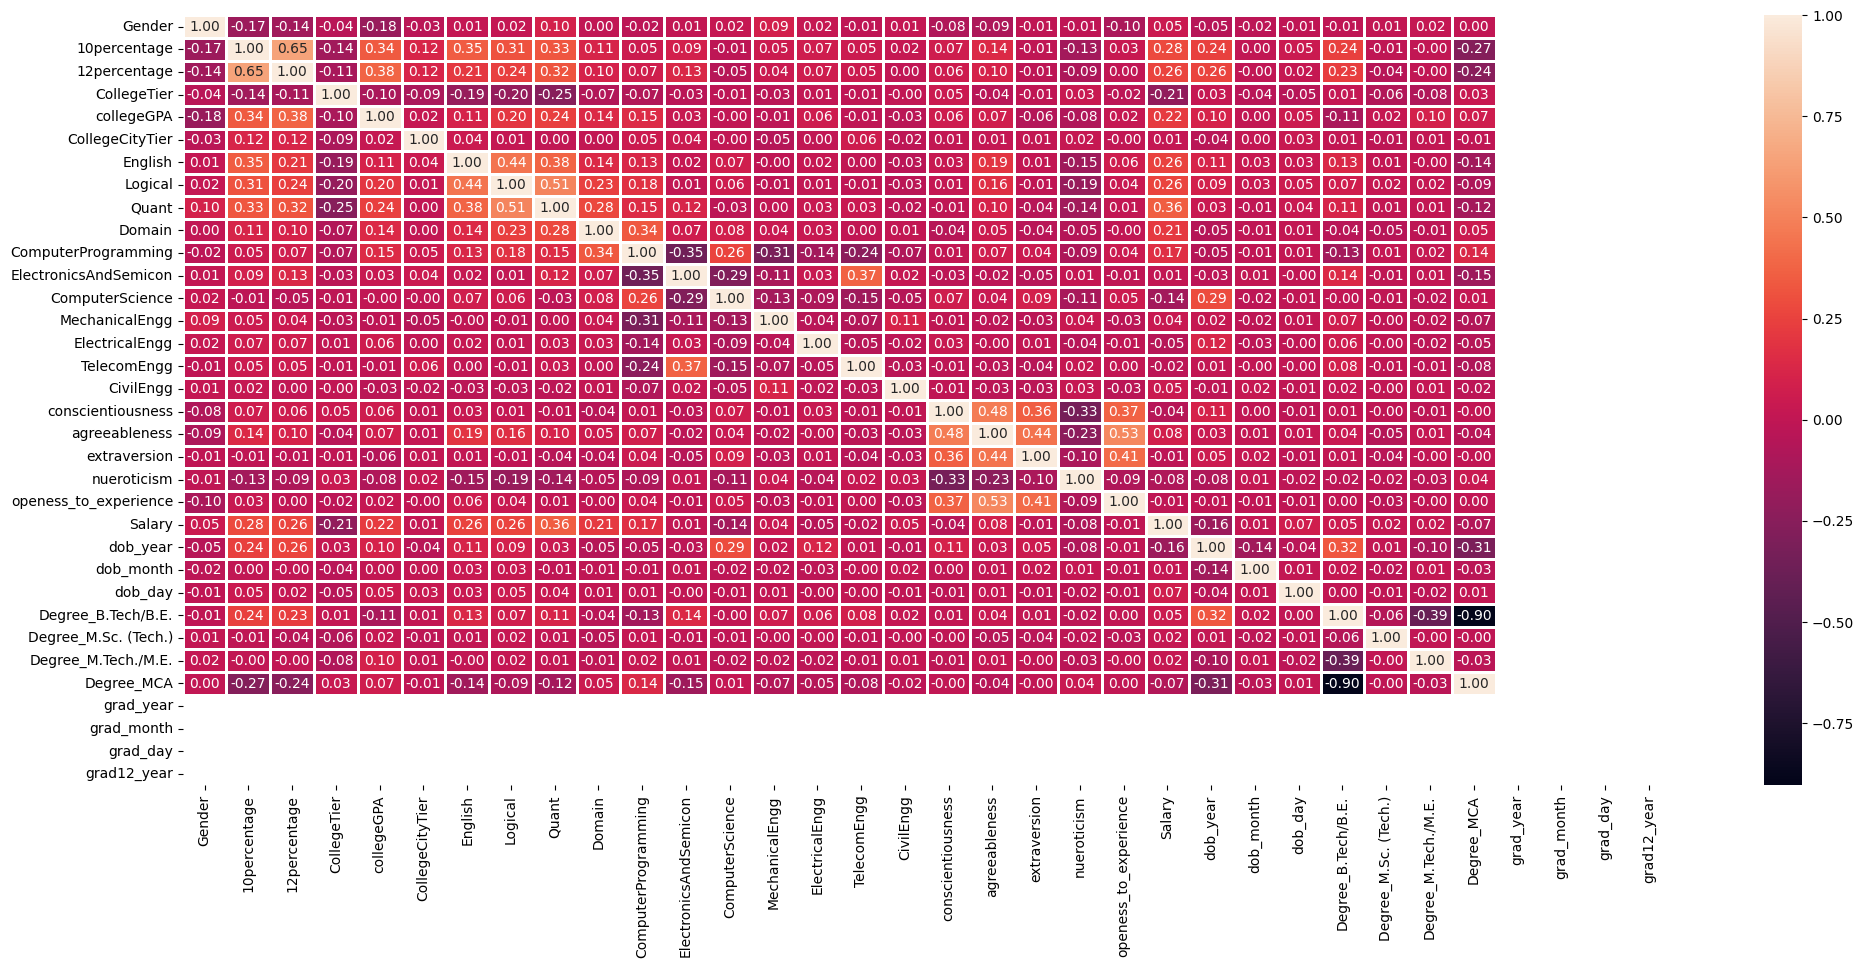

In [203]:
plt.figure(figsize=(24,10))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

array([[<AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': '10percentage'}>,
        <AxesSubplot: title={'center': '12percentage'}>,
        <AxesSubplot: title={'center': 'CollegeTier'}>,
        <AxesSubplot: title={'center': 'collegeGPA'}>,
        <AxesSubplot: title={'center': 'CollegeCityTier'}>],
       [<AxesSubplot: title={'center': 'English'}>,
        <AxesSubplot: title={'center': 'Logical'}>,
        <AxesSubplot: title={'center': 'Quant'}>,
        <AxesSubplot: title={'center': 'Domain'}>,
        <AxesSubplot: title={'center': 'ComputerProgramming'}>,
        <AxesSubplot: title={'center': 'ElectronicsAndSemicon'}>],
       [<AxesSubplot: title={'center': 'ComputerScience'}>,
        <AxesSubplot: title={'center': 'MechanicalEngg'}>,
        <AxesSubplot: title={'center': 'ElectricalEngg'}>,
        <AxesSubplot: title={'center': 'TelecomEngg'}>,
        <AxesSubplot: title={'center': 'CivilEngg'}>,
        <AxesSubplot: title={'center': 

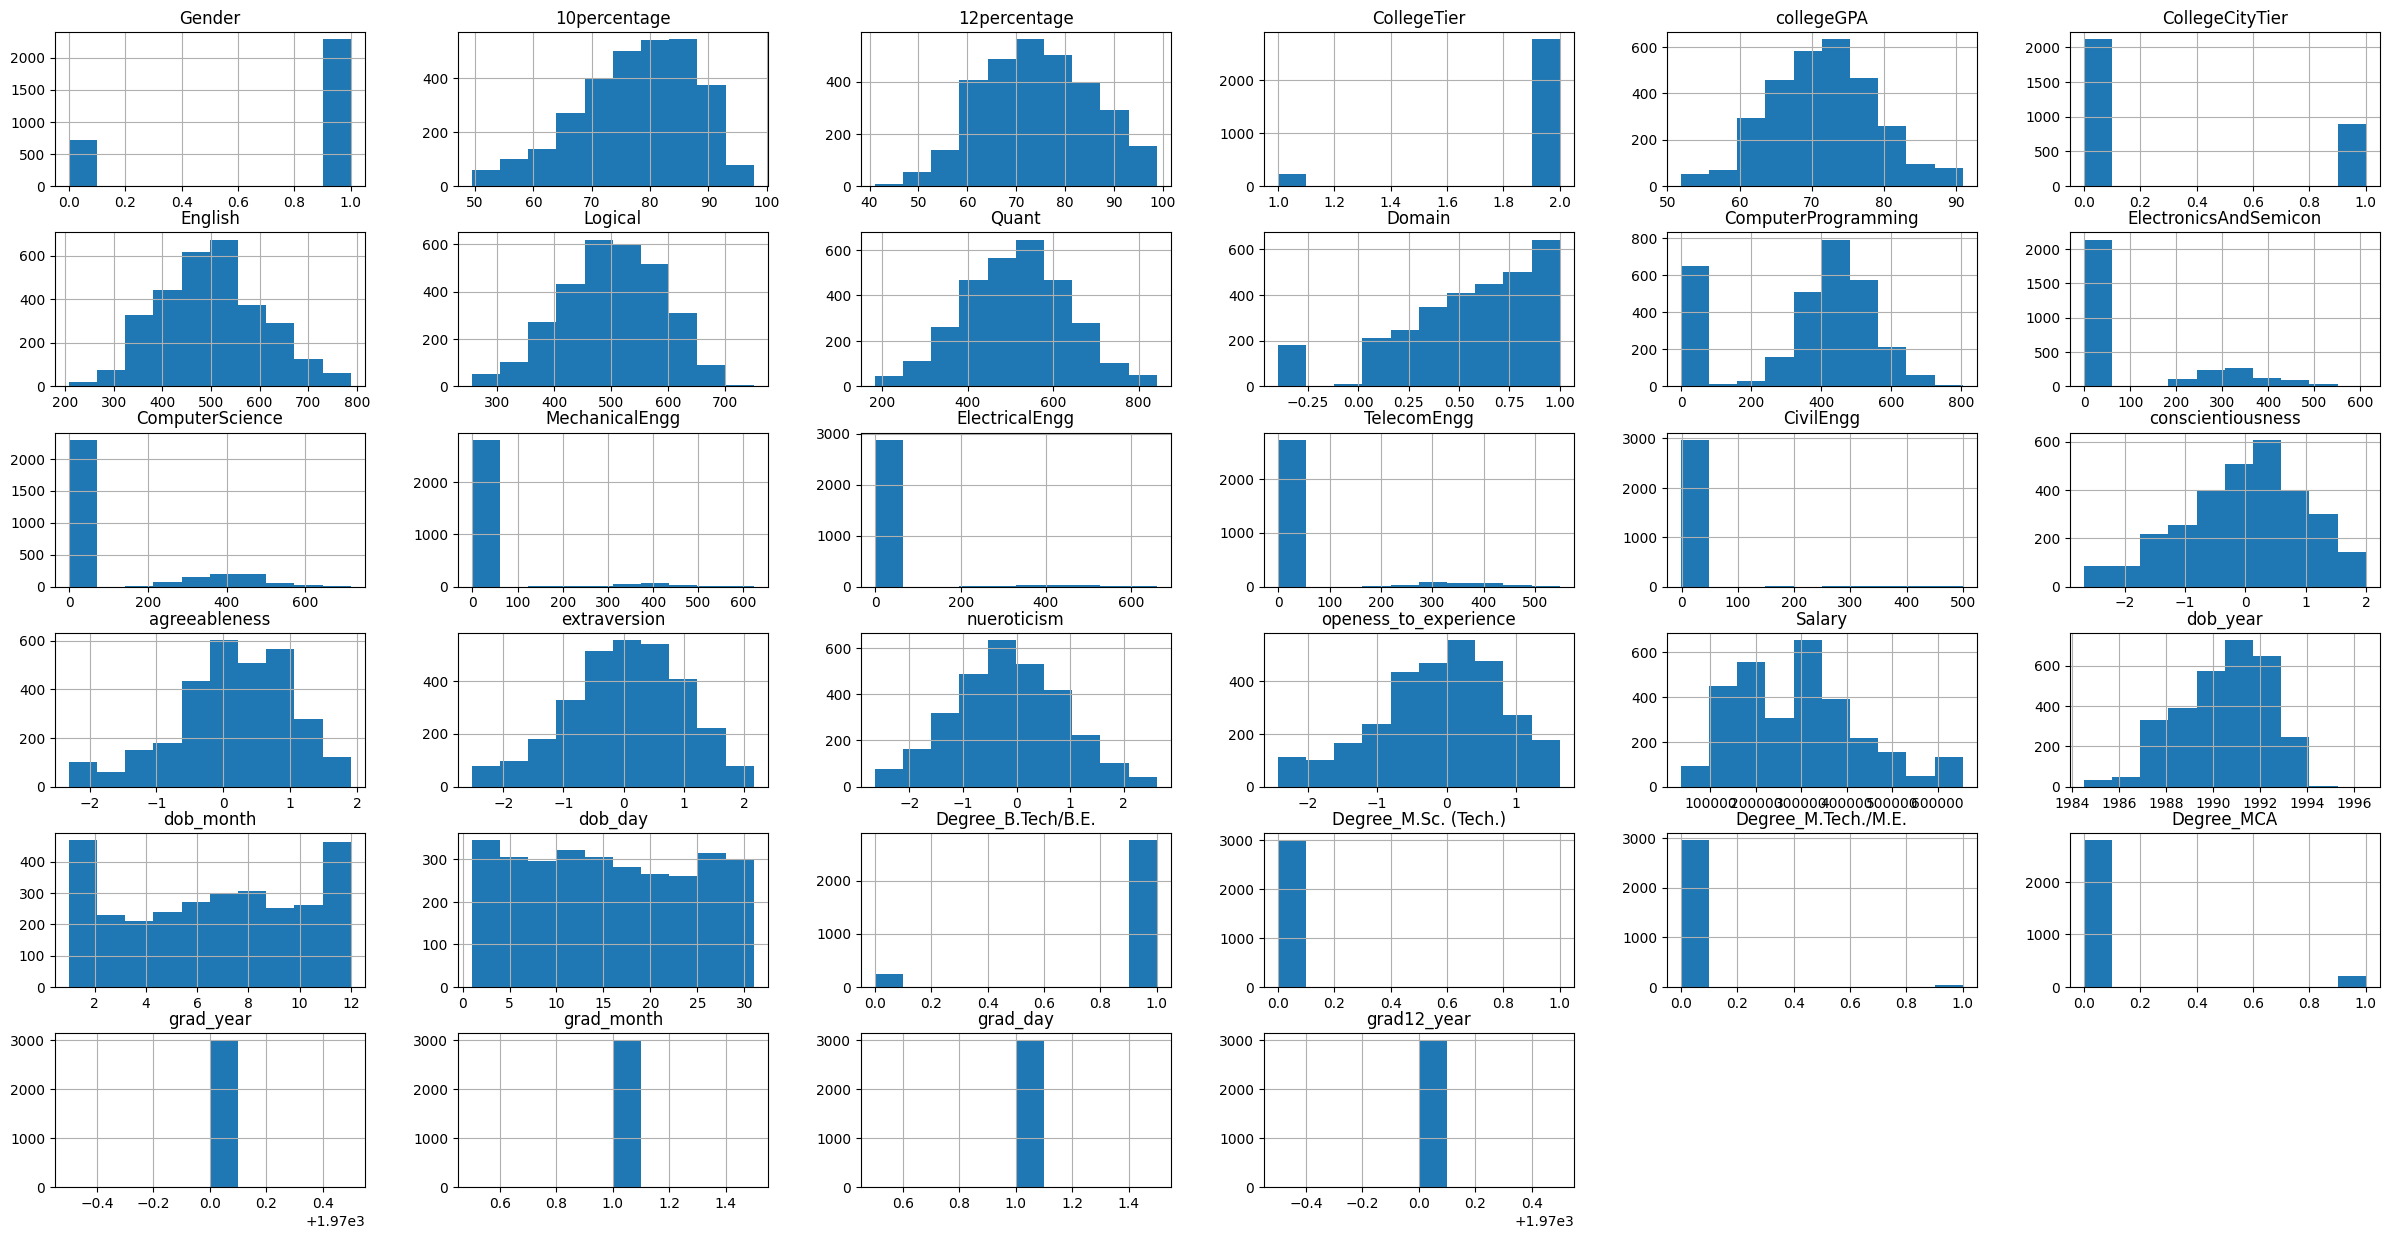

In [204]:
df1.hist(figsize=(30,15))

Feature Engineering

In [205]:
X = df1.drop('Salary',axis=1)
y = df1.Salary

In [206]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2398, 33), (600, 33), (2398,), (600,))

In [207]:
from sklearn.linear_model import LinearRegression

# initialize the linear regression model
reg = LinearRegression()

# Train the model with our training data
reg.fit(X_train, y_train)

LinearRegression()

In [208]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [210]:
y_pred_lin = reg.predict(X_test)

In [211]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_ln = mean_absolute_error(y_test,y_pred_lin)
rmse_ln = sqrt(mean_squared_error(y_test,y_pred_lin))
r_sq_ln = r2_score(y_test,y_pred_lin)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_ln,3),round(rmse_ln,3),round(r_sq_ln,3)))

Mean Absolute Error: 89442.634
Root Mean Square Error: 114092.818
R2 Score: 0.295


Linear Model very bad!

Random Forest

We need to scale for RF

In [212]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [213]:
X_train_RF.shape, X_test_RF.shape

((2398, 33), (600, 33))

In [214]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_RF,y_train)

RandomForestRegressor(n_estimators=10)

In [215]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [217]:
y_pred_RF = rf.predict(X_test_RF)

In [218]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf = mean_absolute_error(y_test,y_pred_RF)
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_RF))
r_sq_rf = r2_score(y_test,y_pred_RF)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf,3),round(rmse_rf,3),round(r_sq_rf,3)))

Mean Absolute Error: 97094.333
Root Mean Square Error: 123198.017
R2 Score: 0.177


With 100 trees

In [219]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_RF,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [220]:
y_pred_RF_100 = rf.predict(X_test_RF)
# print(y_pred_RF_100)

In [221]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_rf100 = mean_absolute_error(y_test,y_pred_RF_100)
rmse_rf100 = sqrt(mean_squared_error(y_test,y_pred_RF_100))
r_sq_rf100 = r2_score(y_test,y_pred_RF_100)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_rf100,3),round(rmse_rf100,3),round(r_sq_rf100,3)))

Mean Absolute Error: 91577.517
Root Mean Square Error: 117397.312
R2 Score: 0.253


RF also very bad!

CNN

In [222]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [223]:
engg_model = Sequential()
engg_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
engg_model.add(Dense(512, activation = "relu"))
engg_model.add(Dense(1024, activation = "relu"))
engg_model.add(Dropout(0.2))
engg_model.add(Dense(1024, activation = "relu"))
engg_model.add(Dense(512, activation = "relu"))
engg_model.add(Dense(256, activation = "relu"))
engg_model.add(Flatten())
engg_model.add(Dense(512, activation = "relu"))
engg_model.add(Dropout(0.5))
engg_model.add(Dense(512, activation = "relu"))
engg_model.add(Dropout(0.5))
engg_model.add(Dense(1, activation = "linear",kernel_regularizer = tf.keras.regularizers.l1(l=0.001)))
engg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8704      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [224]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the network :
engg_model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=[tf.keras.metrics.MAE])

In [225]:
m_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [226]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='engg_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [227]:
history=engg_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


13/15 [=========================>....] - ETA: 0s - loss: 294594.7812 - mean_absolute_error: 294594.7812
Epoch 1: val_loss improved from inf to 246612.90625, saving model to engg_model.h5
15/15 [==============================] - 3s 26ms/step - loss: 293388.9375 - mean_absolute_error: 293388.9375 - val_loss: 246612.9062 - val_mean_absolute_error: 246612.8594
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 159185.2344 - mean_absolute_error: 159185.2188
Epoch 2: val_loss improved from 246612.90625 to 122011.80469, saving model to engg_model.h5
15/15 [==============================] - 0s 15ms/step - loss: 159185.2344 - mean_absolute_error: 159185.2188 - val_loss: 122011.8047 - val_mean_absolute_error: 122011.7734
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 119407.5156 - mean_absolute_error: 119407.5000
Epoch 3: val_loss improved from 122011.80469 to 99431.78125, saving model to engg_model.h5
15/15 [==============================] - 0s 10ms/step 

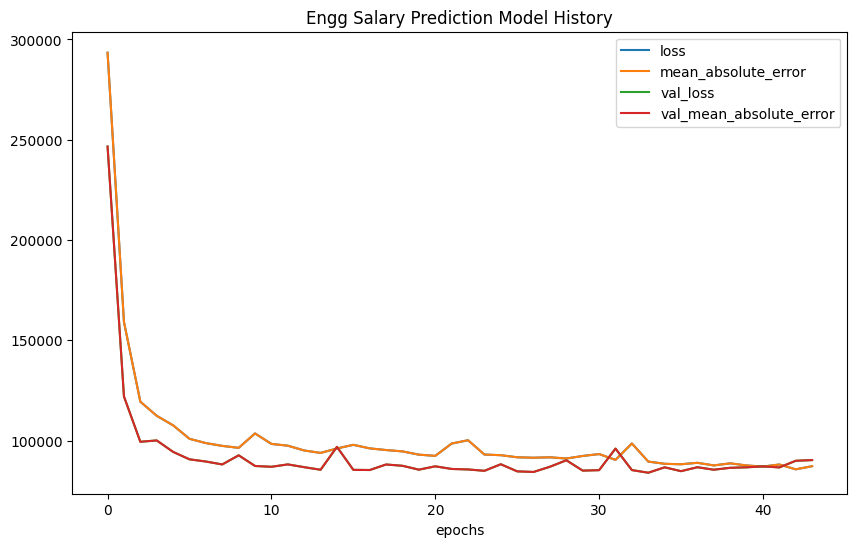

In [228]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [229]:
y_pred_cnn = engg_model.predict(X_test_RF)
# print(y_pred_cnn)

19/19 [==============================] - 0s 4ms/step


In [230]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

mae_cnn = mean_absolute_error(y_test,y_pred_cnn)
rmse_cnn = sqrt(mean_squared_error(y_test,y_pred_cnn))
r_sq_cnn = r2_score(y_test,y_pred_cnn)

print("Mean Absolute Error: {0}\nRoot Mean Square Error: {1}\nR2 Score: {2}".format(round(mae_cnn,3),round(rmse_cnn,3),round(r_sq_cnn,3)))

Mean Absolute Error: 89313.128
Root Mean Square Error: 115977.671
R2 Score: 0.271


In [231]:
linear_reg_results =  pd.Series({ "MAE": mae_ln, "RMSE": rmse_ln, "R-Square": r_sq_ln }, name="Linear Regression")
rf_10_results = pd.Series({ "MAE": mae_rf, "RMSE": rmse_rf, "R-Square": r_sq_rf }, name="Random Forest-10")
rf_100_results = pd.Series({ "MAE": mae_rf100, "RMSE": rmse_rf100, "R-Square": r_sq_rf100 }, name="Random Forest-100")
cnn_results = pd.Series({ "MAE": mae_cnn, "RMSE": rmse_cnn, "R-Square": r_sq_cnn }, name="CNN")


results = pd.DataFrame([linear_reg_results, rf_10_results, rf_100_results, cnn_results])
results.round(3)

,MAE,RMSE,R-Square
Linear Regression,89442.634,114092.818,0.295
Random Forest-10,97094.333,123198.017,0.177
Random Forest-100,91577.517,117397.312,0.253
CNN,89313.128,115977.671,0.271
